In [8]:
from keras.models import  Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from keras.datasets import mnist


In [14]:
from keras.layers.pooling import MaxPooling2D
model = Sequential()
#create the Encoder Network
model.add(Conv2D(30, kernel_size=3, activation='relu', padding = 'same',input_shape=(28,28,1)))
model.add(MaxPooling2D(2, padding = 'same'))
model.add(Conv2D(15,3,activation='relu', padding = 'same'))
model.add(MaxPooling2D(2,padding = 'same'))

#create the Decoder Network
model.add(Conv2D(15, kernel_size=3, activation='relu', padding = 'same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30, kernel_size = 3, activation = 'relu', padding = 'same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,3,activation='sigmoid', padding = 'same')) #output layer



In [15]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 30)        300       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 15)          2040      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 15)      

In [16]:
model.compile(optimizer='adam', loss = 'binary_crossentropy')

In [37]:
import numpy as np
#load the data and train the model
(X_train,_), (X_test, _)= mnist.load_data()
X_train= X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = np.reshape(X_train, (len(X_train), 28,28,1))
X_valid = X_train[:5000]
X_train = X_train[5000:]
X_test = np.reshape(X_test, (len(X_test), 28,28,1))

In [38]:
X_valid.shape

(5000, 28, 28, 1)

In [39]:
X_train.shape

(55000, 28, 28, 1)

In [40]:
X_test.shape

(10000, 28, 28, 1)

In [41]:
model.fit(X_train, X_train, epochs = 5,batch_size = 128, validation_data = (X_valid, X_valid))

Epoch 1/5
430/430 [==============================] - 119s 276ms/step - loss: 0.0705 - val_loss: 0.0703
Epoch 2/5
430/430 [==============================] - 118s 275ms/step - loss: 0.0701 - val_loss: 0.0699
Epoch 3/5
430/430 [==============================] - 119s 277ms/step - loss: 0.0698 - val_loss: 0.0696
Epoch 4/5
430/430 [==============================] - 119s 276ms/step - loss: 0.0694 - val_loss: 0.0693
Epoch 5/5
430/430 [==============================] - 118s 275ms/step - loss: 0.0691 - val_loss: 0.0690


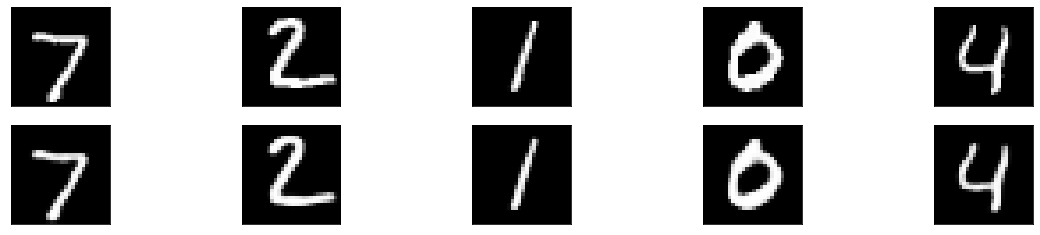

In [42]:
import matplotlib.pyplot as plt
pred = model.predict(X_test)
plt.figure(figsize = (20,4))
for i in range(5) :
  #display the original image
  ax = plt.subplot(2,5,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #display reconstructed image
  ax = plt.subplot(2,5, i+5+1)
  plt.imshow(pred[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

